In [16]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [17]:
from manify.curvature_estimation.delta_hyperbolicity import (
    sampled_delta_hyperbolicity,
    delta_hyperbolicity,
)

from manify.manifolds import ProductManifold

import torch
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

## Baseline Hyperbolic Delta graph

Actual Delta values: 0.11794263869524002
Mean Delta values: -0.05212394520640373


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


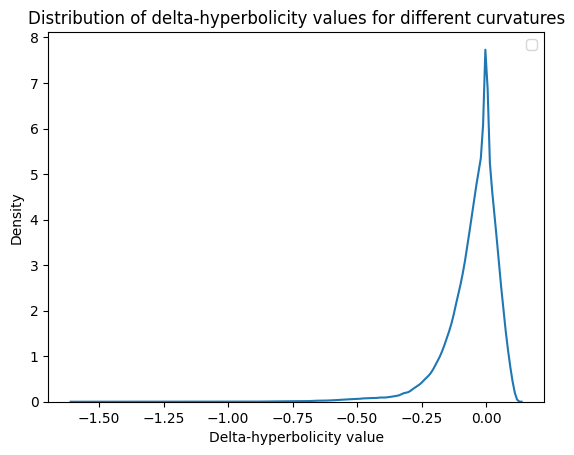

In [18]:
N_SAMPLES = 100
pm = ProductManifold(signature=[(-3, 4)])
X, _ = pm.sample(z_mean=torch.stack([pm.mu0] * N_SAMPLES))
dists = pm.pdist(X)

deltas = delta_hyperbolicity(dists)

print(f'Actual Delta values: {deltas.max()}')
print(f'Mean Delta values: {deltas.mean()}')

# KDE PLOT
sns.kdeplot(deltas.detach().cpu().flatten().numpy())

plt.xlabel("Delta-hyperbolicity value")
plt.ylabel("Density")
plt.title("Distribution of delta-hyperbolicity values for different curvatures")
plt.legend()
plt.show()

## Dimensionality Testing

Delta for 10 dimensions: -0.05492830649018288
Actual Delta values: 0.0036781183443963528
Delta std: 0.11398126184940338
Delta for 120 dimensions: -0.03247297182679176
Actual Delta values: 0.0027480339631438255
Delta std: 0.08348396420478821
Delta for 230 dimensions: -0.02595701813697815
Actual Delta values: 0.002174580004066229
Delta std: 0.07688961923122406
Delta for 340 dimensions: -0.023111611604690552
Actual Delta values: 0.0018841783748939633
Delta std: 0.07483690232038498
Delta for 450 dimensions: -0.020838985219597816
Actual Delta values: 0.001794192474335432
Delta std: 0.07234460115432739
Delta for 560 dimensions: -0.019418584182858467
Actual Delta values: 0.0015076251002028584
Delta std: 0.07041745632886887
Delta for 670 dimensions: -0.01840473897755146
Actual Delta values: 0.0013817454455420375
Delta std: 0.0710037499666214
Delta for 780 dimensions: -0.017326831817626953
Actual Delta values: 0.0014928048476576805
Delta std: 0.07003365457057953
Delta for 890 dimensions: -0.016

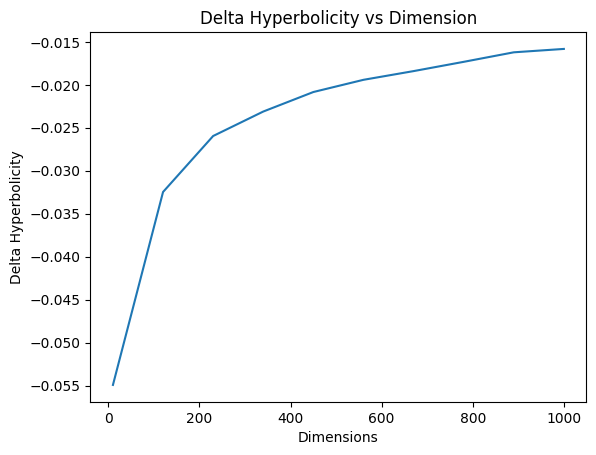

In [19]:
# Euclidean Space (Normal Distribution)

dims = np.linspace(10,1000,10, dtype=int).tolist()
N = 400

deltas = []

for dim in dims:
    points = torch.randn(N,dim)
    dists = torch.cdist(points,points)
    delta = delta_hyperbolicity(dists)
    print(f"Delta for {dim} dimensions: {delta.mean()}")
    print(f'Actual Delta values: {delta.max() / 100}')
    print(f'Delta std: {delta.std()}')
    deltas.append(delta.max())


plt.figure()
plt.plot(dims, deltas)
plt.xlabel('Dimensions')
plt.ylabel('Delta Hyperbolicity')
plt.title('Delta Hyperbolicity vs Dimension')
plt.show()


Delta for 10 dimensions: -0.028281865641474724
Actual Delta values: 0.001270045293495059
Delta std: 0.06350148469209671
Delta for 35 dimensions: -0.012737017124891281
Actual Delta values: 0.000686640792991966
Delta std: 0.05660032108426094
Delta for 60 dimensions: -0.009605697356164455
Actual Delta values: 0.00047691314830444753
Delta std: 0.0573023185133934
Delta for 86 dimensions: -0.00794960092753172
Actual Delta values: 0.00035201048012822866
Delta std: 0.05820825323462486
Delta for 111 dimensions: -0.007245680317282677
Actual Delta values: 0.00028899210155941546
Delta std: 0.05960136651992798
Delta for 136 dimensions: -0.007032875902950764
Actual Delta values: 0.0002483814023435116
Delta std: 0.06151958927512169
Delta for 162 dimensions: -0.006565217860043049
Actual Delta values: 0.00020833811140619218
Delta std: 0.06145554408431053
Delta for 187 dimensions: -0.006292853504419327
Actual Delta values: 0.00018531714158598334
Delta std: 0.06169276684522629
Delta for 213 dimensions: -

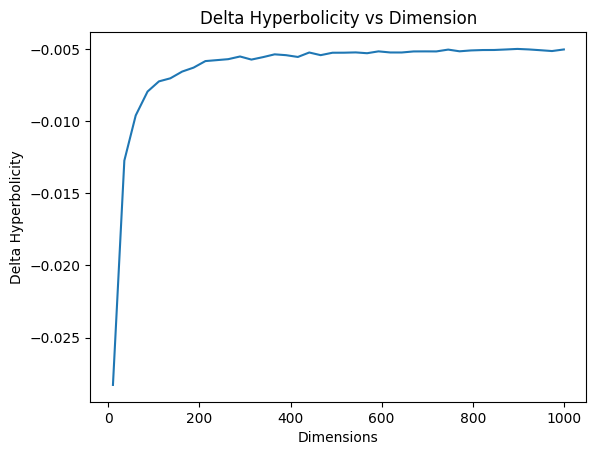

In [20]:
# Hyperbolic Space 

# Euclidean Space (Normal Distribution)

dims = np.linspace(10,1000,40, dtype=int).tolist()
N = 400
CURVATURE = -1 # When curvature is -1 and we get to high dim, we get NaN values

deltas = []

for dim in dims:
    pm = ProductManifold(signature=[(CURVATURE, dim)])
    X, _ = pm.sample(z_mean=torch.stack([pm.mu0] * N))
    dists = pm.pdist(X)
    delta = delta_hyperbolicity(dists)

    print(f"Delta for {dim} dimensions: {delta.mean()}")
    print(f'Actual Delta values: {delta.max() / 100}')
    print(f'Delta std: {delta.std()}')
    deltas.append(delta.mean().item())


plt.figure()
plt.plot(dims, deltas)
plt.xlabel('Dimensions')
plt.ylabel('Delta Hyperbolicity')
plt.title('Delta Hyperbolicity vs Dimension')
plt.show()


Delta for 10 dimensions: -0.025873472914099693
Actual Delta values: 0.0030975115951150656
Delta std: 0.05413036793470383
--------------------------------
Delta for 80 dimensions: -0.017237836495041847
Actual Delta values: 0.001788402209058404
Delta std: 0.03614305704832077
--------------------------------
Delta for 151 dimensions: -0.005377768538892269
Actual Delta values: 0.0007976772030815482
Delta std: 0.013137010857462883
--------------------------------
Delta for 222 dimensions: -0.026757651939988136
Actual Delta values: 0.0013728922931477427
Delta std: 0.05345968157052994
--------------------------------
Delta for 292 dimensions: -0.047355156391859055
Actual Delta values: 0.001767493668012321
Delta std: 0.09896372258663177
--------------------------------
Delta for 363 dimensions: -0.01779232732951641
Actual Delta values: 0.0015078643336892128
Delta std: 0.03765321522951126
--------------------------------
Delta for 434 dimensions: -0.01946227066218853
Actual Delta values: 0.0015

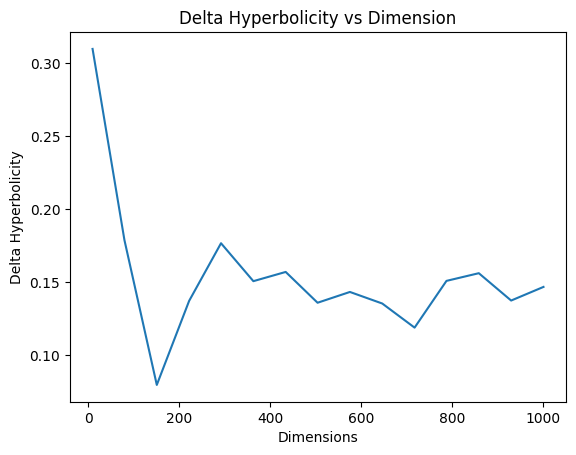

In [29]:
# Hyperbolic Space with Euclidean Distances

dims = np.linspace(10,1000,15, dtype=int).tolist()
N = 400
CURVATURE = -1 # When curvature is -1 and we get to high dim, we get NaN values

deltas = []

for dim in dims:
    pm = ProductManifold(signature=[(CURVATURE, dim)])
    X, _ = pm.sample(z_mean=torch.stack([pm.mu0] * N))
    dists = torch.cdist(X,X)
    delta = delta_hyperbolicity(dists)
    print(f"Delta for {dim} dimensions: {delta.mean()}")
    print(f'Actual Delta values: {delta.max() / 100}')
    print(f'Delta std: {delta.std()}')
    print('--------------------------------')
    deltas.append(delta.max().item())


plt.figure()
plt.plot(dims, deltas)
plt.xlabel('Dimensions')
plt.ylabel('Delta Hyperbolicity')
plt.title('Delta Hyperbolicity vs Dimension')
plt.show()


delta mean for dim=10: -0.037965986877679825
delta mean for dim=257: -0.019620738923549652
delta mean for dim=505: -0.01930517889559269
delta mean for dim=752: -0.019297534599900246
delta mean for dim=1000: -0.019179612398147583


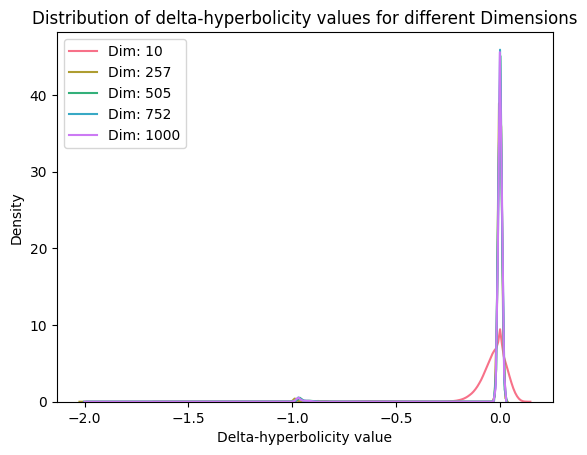

In [28]:
# Now, lets look at KDE plots of the delta distribution as dim increases

dims = np.linspace(10,1000,5, dtype=int).tolist()
N = 100
CURVATURE = -1 # When curvature is -1 and we get to high dim, we get NaN values

deltas_tensors = []

for dim in dims:
    pm = ProductManifold(signature=[(CURVATURE, dim)])
    X, _ = pm.sample(z_mean=torch.stack([pm.mu0] * N))
    dists = pm.pdist(X)
    delta = delta_hyperbolicity(dists)

    deltas_tensors.append(delta)
    print(f'delta mean for dim={dim}: {delta.mean()}')

colors = sns.color_palette("husl", len(dims))
for i, deltas in enumerate(deltas_tensors):
    sns.kdeplot(deltas.detach().cpu().numpy().flatten(), label=f"Dim: {dims[i]}", color=colors[i])

plt.xlabel("Delta-hyperbolicity value")
plt.ylabel("Density")
plt.title("Distribution of delta-hyperbolicity values for different Dimensions")
plt.legend()
plt.show()

In [ ]:
Ks = [0,1,2]
dims = np.linspace(10,1000,5, dtype=int).tolist()